In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scripts.category_analysis import *
from clustering import *

In [2]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
_, adapted_movies_df = analysis_by_category(adapted_movies_df)

In [14]:
all_movies_df = pd.read_csv('all_movies.csv')
_, all_movies_df = analysis_by_category(all_movies_df)

In [3]:
df_genre_adapted, df_transformed_adapted = get_dummy_genre(adapted_movies_df)
df_genre_all, df_transformed_all = get_dummy_genre(all_movies_df)

NameError: name 'all_movies_df' is not defined

,k,sse
0,2,2.126587e+06
1,3,1.292736e+06
2,4,1.006982e+06
3,5,7.263684e+05
4,6,5.974352e+05
5,7,4.850570e+05
6,8,4.116850e+05
7,9,3.646090e+05
8,10,3.279543e+05
9,11,2.781442e+05


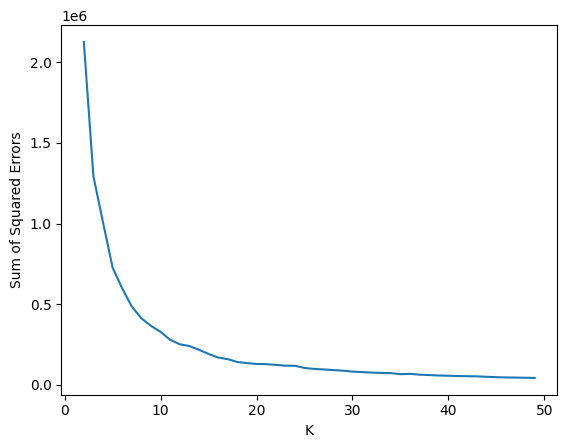

In [21]:
df = df_genre_adapted.drop(columns=['wikipedia_id' ])

X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(df)


# Cluster the data in 3 groups
plot_sse(X_reduced_tsne, start=2, end=50)

Text(0.5, 1.0, 't-SNE')

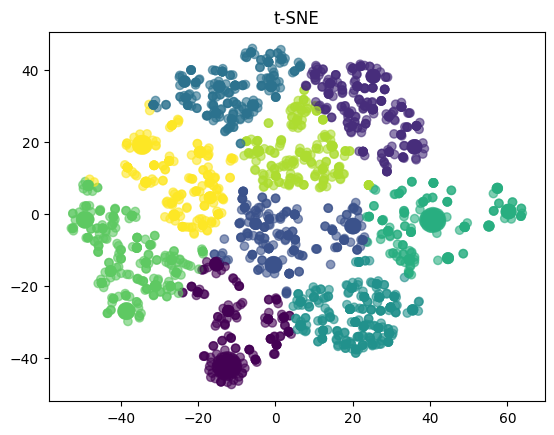

In [55]:
labels = KMeans(n_clusters=9, random_state=0).fit_predict(X_reduced_tsne)

# Plot the data reduced in 2d space with t-SNE
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
plt.title("t-SNE")